In [1]:
# librerias


import pandas as pd
pd.set_option('display.max_columns', None)
import re
import numpy as np

import warnings
warnings.filterwarnings('ignore')


# para pintar
import pylab as plt
import seaborn as sns

#para que salga el grafico
%matplotlib inline

In [2]:
tiburones_ori=pd.read_csv('attacks.csv', encoding = "ISO-8859-1")
tiburones=tiburones_ori.copy()

In [3]:
#tiburones.head()

In [4]:
tiburones.shape

(25723, 24)

In [5]:
tiburones.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
#tiburones.info()

In [7]:
#tiburones.describe(include='all').T
nan_cols=tiburones.isna().sum()  # serie con los valores nulos por columna

nan_cols

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

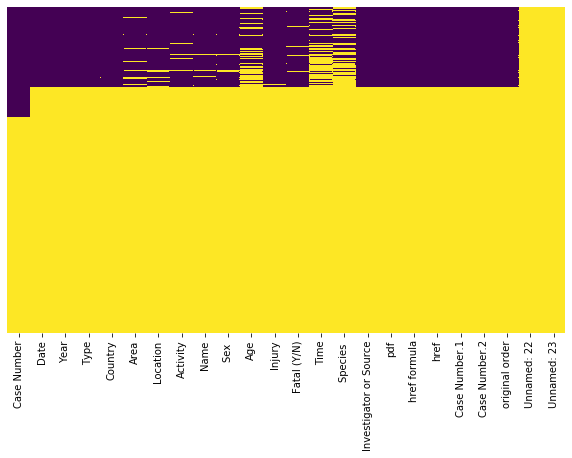

In [8]:
plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

sns.heatmap(tiburones.isna(),  # mapa de calor
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()

In [9]:
cols=['Unnamed: 22', 'Unnamed: 23']
#Creamos un nuevo data set con la limpieza para mantener el data set de inicio
tiburones1=tiburones
tiburones1.drop(columns=cols, inplace=True)

In [10]:
tiburones1.shape 

(25723, 22)

In [13]:
#tiburones1.iloc[6180]

In [14]:
tiburones1.drop_duplicates(inplace=True)

In [15]:
tiburones1.shape

(6312, 22)

In [16]:
nombres=['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_Y_N', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'original_order']
tiburones1.columns=nombres

In [17]:
tiburones2=tiburones1

In [18]:
tiburones2.fillna({'name': 'desconocido','type':'desconocido', 'sex':'desconocido', 'activity':'desconocido'}, inplace=True)


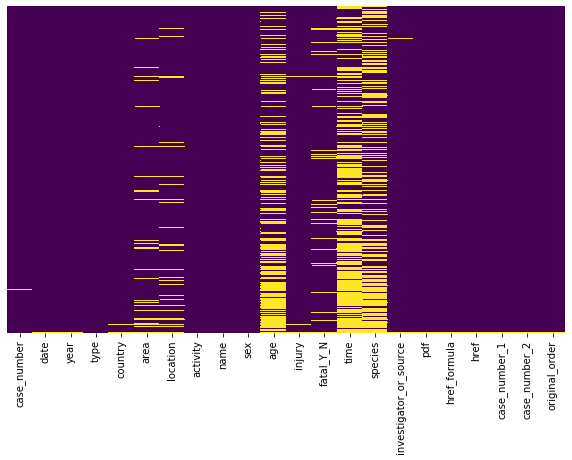

In [19]:
plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

sns.heatmap(tiburones2.isna(),  # mapa de calor
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()

In [20]:
tiburones2['year'].fillna(0,inplace=True)
tiburones2['year'] = tiburones2['year'].astype(int)

In [21]:
tiburones2['year'] = tiburones2['year'].astype(str)
tiburones2.fillna('desconocido',inplace=True)

In [22]:
#Esto se puede hacer con una funcion que recoja 'e' y me devuelva el valor que sobreescribe. Esta función se llamaría en el metodo apply directamente
anio=[]
cont=0
for e in tiburones2.year:
    if e == '0':
        anio.append(tiburones2.iloc[cont].date)
    else:
        anio.append(e)
    cont+=1

In [23]:
tiburones2['anio'] = anio

In [24]:
tiburones2.drop('year', axis=1, inplace=True)

In [25]:
tiburones3 = tiburones2

In [26]:
#tiburones.info()

In [27]:
tiburones3['case_number'].replace(['0'], 'desconocido', inplace=True)
tiburones3['case_number'].replace(['xx'], 'desconocido', inplace=True)

In [28]:
duplicados=[6302,6303,6304,6305,6306,6307,6308,6309]
tiburones3.drop(index=duplicados, inplace=True)

In [29]:
pd.set_option('display.max_rows', None)
#tiburones3[['case_number','anio','date']]
#tiburones3

In [30]:
sobrantes=[8702,25722,6272, 6271,6261,6180,6179,6178,6177]
tiburones3.drop(index=sobrantes, inplace=True)

In [31]:
tiburones3.drop(['case_number','date','case_number_1','case_number_2'], axis=1, inplace=True)

In [32]:
tiburones4=tiburones3


In [33]:
tiburones4.anio=tiburones4.anio.str.replace('Before','')
tiburones4 = tiburones4[tiburones4.anio != 'No date']

In [34]:
#tiburones4.iloc[6280]

In [35]:
def patron(x):
    if len(x)>4:
        num=str(re.findall('\d{4}', x))
        return num[2:6]
    else:
        return x

In [36]:
tiburones4['anio']=tiburones4.anio.apply(patron)

In [37]:
#keyword='No Date'
#select3=tiburones4[tiburones4.anio.str.contains(keyword, regex=True)]
#select3.head()

In [38]:
tiburones4['anio'].replace(['Reported 08-Jan-2017'], '2017', inplace=True)
tiburones4['anio'].replace(['Reported 19-Aug-1836'], '2017', inplace=True)
tiburones4['anio'] = tiburones4['anio'].astype(int)

In [39]:
#tiburones4.shape
tiburones5=tiburones4

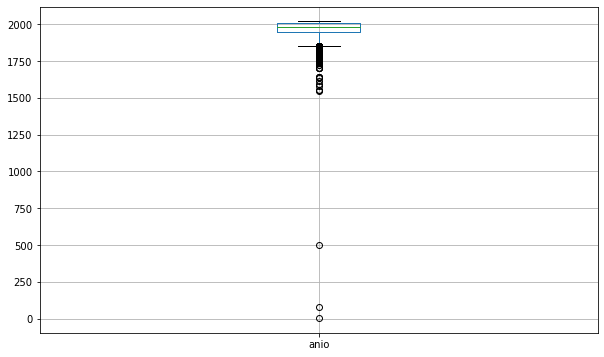

In [40]:
plt.figure(figsize=(10, 6))

tiburones5.boxplot(column=['anio']);

In [41]:
stats=tiburones5.describe().T
stats['IQR']=stats['75%']-stats['25%']
stats.tail()

,count,mean,std,min,25%,50%,75%,max,IQR
anio,6289.0,1965.928128,62.172953,5.0,1944.0,1978.0,2005.0,2018.0,61.0


In [42]:
outliers=pd.DataFrame(columns=stats.index)

In [43]:
def get_outliers(stats: pd.DataFrame, threshold: float = 1.5) -> pd.DataFrame:
    
    """
    Esta funcion recibe un dataframe df.describe().T.
    
    Devuelve un dataframe.
    
    :param: stats, pd.DataFrame
    :param: threshold, umbral del test de tukey
    
    :return: pd.DataFrame
    """
    
    outliers=pd.DataFrame(columns=stats.index)

    for c in stats.index:

        iqr=stats.at[c, 'IQR']

        cutoff=threshold * iqr  # test tukey

        lower=stats.at[c, '25%'] - cutoff

        res=tiburones5[(tiburones5[c] < lower)].copy()

        res['outliers']=c

        outliers=outliers.append(res, sort=True)

    
    return outliers


In [44]:
get_outliers(stats, 1.9)

,activity,age,anio,area,country,fatal_Y_N,href,href_formula,injury,investigator_or_source,location,name,original_order,outliers,pdf,sex,species,time,type
6096,"British ship, Britannia, was loading lumber. ...",17,1828,Western Area,SIERRA LEONE,N,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,"Left arm severed 2.5"" from elbow, groin, abdom...",Account by J. Boyle,"River Sierra Leone, 35 miles upriver from Fre...","Thomas Corrigle, an apprentice from the ship",207,anio,1828.09.28-Corrigle.pdf,M,desconocido,desconocido,Unprovoked
6097,Surfing,desconocido,1828,Hawaii,USA,Y,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,"J. Borg, p.68; L. Taylor (1993), pp.94-95","Uo, Lahaina, Maui",Male,206,anio,1828.00.00-male.pdf,M,desconocido,desconocido,Unprovoked
6098,Swimming,desconocido,1827,Western Area,SIERRA LEONE,N,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,The boy's foot was bitten,Edinburgh Advertiser. 9/12/1828,Tombo Island in the Sierra Leone River,"A boy, one of the crew of the ship Thomas Gelston",205,anio,1827.06.00.b-boy-crew-Gelston.pdf,M,desconocido,desconocido,Unprovoked
6099,Swimming,desconocido,1827,Western Area,SIERRA LEONE,N,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,Davis' leg was severed,Edinburgh Advertiser. 9/12/1828,Tombo Island in the Sierra Leone River,"William Davis, of the ship Thomas Gelston",204,anio,1827.06.00.a-Davis.pdf,M,desconocido,desconocido,Unprovoked
6100,desconocido,desconocido,1827,desconocido,EGYPT,Y,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,Remains of the men were recovered from a +17-f...,"C. Moore, GSAF",Alexandria,Two men,203,anio,1827.00.00-Alexandria.pdf,M,desconocido,desconocido,Unprovoked
6101,desconocido,desconocido,1826,Paraiba,BRAZIL,N,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,Leg severed,Book of the Ocean,Paraiba,a seaman from the ship Beverly,202,anio,1826.12.00-seaman-Beverly.pdf,M,desconocido,desconocido,Unprovoked
6102,Bathing,desconocido,1826,Cape Coast,GHANA,Y,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,"Sydney Gazette and New South Wales Advertiser,...",desconocido,a seaman from HM Redwing,201,anio,1826.11.00-seaman-Redwing.pdf,M,desconocido,desconocido,Unprovoked
6103,HBM Magpie foundered in a squall,desconocido,1826,desconocido,CUBA,Y,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,Edinburgh Advertiser. 10/20/1826,desconocido,Lieutenant Edward Smith,200,anio,1826.08.28-Smith.pdf,M,desconocido,desconocido,Sea Disaster
6104,Bathing,desconocido,1826,Cumberland,ENGLAND,desconocido,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,"The Times (London), 8/15/1826",Whitehaven,child,199,anio,1826.08.15.R-Whitehaven.pdf,desconocido,desconocido,desconocido,Unprovoked
6105,Jumped overboard,desconocido,1826,desconocido,JAMAICA,Y,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,"The Times, 7/19/1826",desconocido,Thomas Loring,198,anio,1826.05.20.R-Loring.pdf,M,desconocido,19h00-20h00,Unprovoked


In [54]:
outliers.index
tiburones5.drop(index=outliers.index, inplace=True)


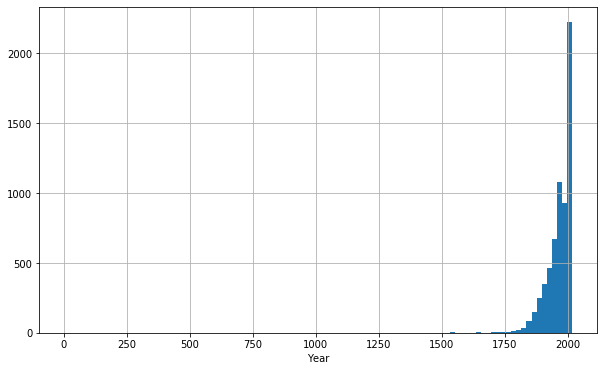

In [55]:
plt.figure(figsize=(10, 6))

tiburones5.anio.hist(bins=100)

plt.xlabel('Year');

In [56]:
tiburones6=tiburones5

In [57]:
cols=tiburones6.columns.tolist()
cols=['anio','country','area','location','species','injury','fatal_Y_N','name','sex','age','type','activity','time','investigator_or_source','original_order','pdf','href_formula','href']
tiburones6=tiburones6.reindex(columns=cols)

In [58]:
#tiburones6

In [59]:
tiburones6.country=tiburones6.country.str.replace('?','')
tiburones6.country=tiburones6.country.str.lstrip()
tiburones6.country=tiburones6.country.str.lower()
tiburones6.country=tiburones6.country.str.capitalize()

In [60]:
def locacion(x):
    cont=0
    if x == 'desconocido':
        return tiburones6.iloc[cont].location
    else:
        return x
    cont+=1

In [61]:
tiburones6['area']=tiburones6.area.apply(locacion)
tiburones6['area'].replace(['22ºN, 88ºE'], 'Mandarmani', inplace=True)
tiburones6['area'].replace(['dÉtang-Salé'], "Étang-Salé", inplace=True)
tiburones6['area'].replace(['1000 miles west of Hawaii'], "Hawaii", inplace=True)
tiburones6['area'].replace(['25 km off the coast of Iran & 483km from mouth of Persian Gulf'], "Hawaii", inplace=True)
tiburones6['area'].replace(["L' Etang Salé-les-Bains"], "Étang-Salé", inplace=True)

In [62]:
tiburones6.area=tiburones6.area.str.lstrip()
tiburones6.area=tiburones6.area.str.lower()
tiburones6.area=tiburones6.area.str.capitalize()

In [63]:
#tiburones6
tiburones7=tiburones6
def fatality(x):
    if re.findall('(fatal)', x):
        return 'Y'
    else:
        return 'N'

In [66]:
tiburones7.injury=tiburones7.injury.str.lower()

In [70]:
tiburones7['fatal_Y_N']=tiburones7.injury.apply(fatality)


In [71]:
tiburones7[['injury','fatal_Y_N']]

,injury,fatal_Y_N
0,"no injury to occupant, outrigger canoe and pad...",N
1,minor injury to left thigh,N
2,injury to left lower leg from surfboard skeg,N
3,minor injury to lower leg,N
4,lacerations to leg & hand shark provoked incident,N
5,"no injury, board bitten",N
6,fatal,Y
7,minor injury to foot. provoked incident,N
8,lower left leg bitten,N
9,minor injury to foot,N


In [445]:
muertes=tiburones6[['injury','fatal_Y_N']].loc[tiburones6['fatal_Y_N'] == 'desconocido']



SyntaxError: invalid syntax (<ipython-input-445-5adff124f49e>, line 2)

In [448]:
muertes.index.loc[muertes['injury']]

AttributeError: 'Int64Index' object has no attribute 'loc'

In [ ]:

muertes['fatal_Y_N']=muertes.injury.apply(fatality)